In [1]:
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.SIM928_voltage_source import SIM # as DC
from nanodrivers.visa_drivers.vna import VNA

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift


#file_store
import os

#time
import time
from datetime import datetime, timedelta


from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_6'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_6 already exists


In [2]:
dc = SIM()
dc.idn()

Connection exist: Stanford_Research_Systems,SIM928,s/n004757,ver1.1



In [3]:
dc.set_volt(1)

In [4]:
dc.disconnect()

SIM928 is now disconnected from SIM900 mainframe


In [4]:
vna = VNA()
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [5]:
anapico = ANAPICO()
anapico.idn()

Connection exist: AnaPico AG,APMS20G,3C6-0B4F40003-0985,1.0.7



# Rough gain sweep

In [6]:
from TWPA_scearch_best_gain import *

In [7]:
TWPA = TWPA_best_gain(file_path = adress, file_name = 'Rough_gain_sweep_500mK', 
                      vna = vna, anapico = anapico, dc = dc,
                      gain_threshold=18,
                      temp=500)

In [9]:
mat = TWPA.load_database(folder_address=adress, last_one = True)

Database from the file 
   C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_6\1st_tone.mat  
uploaded


KeyError: 'best_gain_DC'

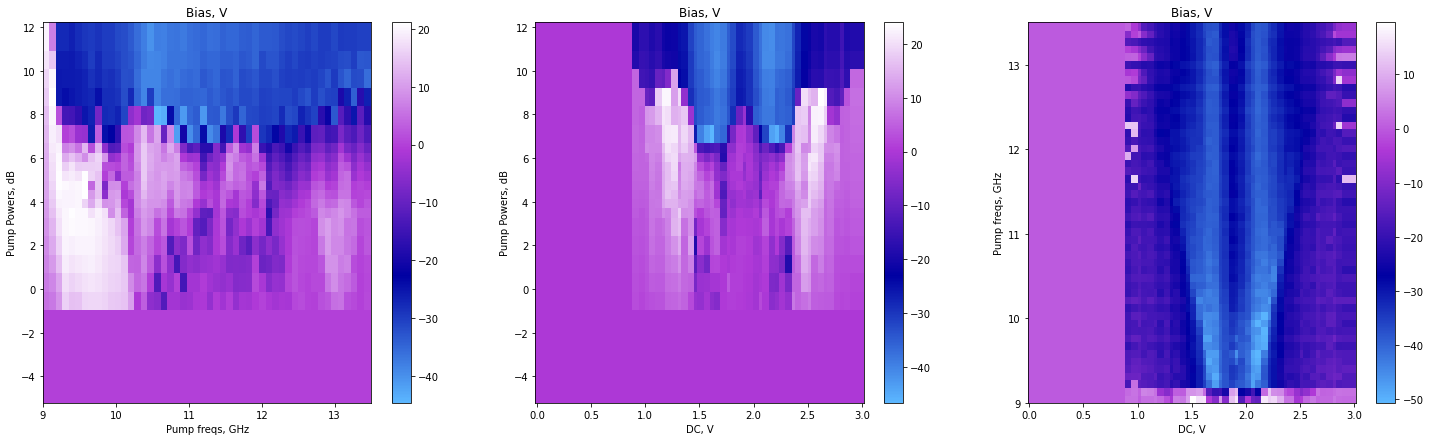

1.5
10.98
12.0


In [22]:
%matplotlib inline
index_dc=50
index_pf=1100
index_pp=40
TWPA.plot_database(index_dc=index_dc, index_pf=index_pf, index_pp=index_pp)

print(TWPA.database['volts'][index_dc])
print(TWPA.database['pump_freqs'][index_pf]/1e9)
print(TWPA.database['pump_powers'][index_pp])

In [11]:
TWPA.min_dc = 1
TWPA.max_dc = 3
TWPA.min_pump_power=0
TWPA.max_pump_power=12
TWPA.min_pump_freq=9e9
TWPA.max_pump_freq=13.5e9

In [12]:
TWPA.sweep_database(dc_nop=41, pp_nop=21, pf_nop=51, conditional_gain_tr=-10)

Script started at 2025-04-23 13:29:26


New DC set to 1.0 V
Range DC[1.00] = [0.90, 1.08], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> 1.19335

New DC set to 1.05 V
Range DC[1.05] = [0.96, 1.14], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -4.1510

New DC set to 1.1 V
Range DC[1.10] = [1.02, 1.20], PF[11.43] = [11.34, 11.52], PP[8.5200] = [7.75, 9.45] --> 18.254.551
Range DC[1.10] = [1.02, 1.20], PF[11.43] = [11.34, 11.52], PP[9.2700] = [8.60, 10.30] --> 18.554
Range DC[1.10] = [1.02, 1.20], PF[11.52] = [11.43, 11.61], PP[9.2700] = [8.60, 10.30] --> 19.673233
Range DC[1.10] = [1.02, 1.20], PF[11.52] = [11.43, 11.61], PP[10.1100] = [9.45, 11.15] --> 20.323
Range DC[1.10] = [1.02, 1.20], PF[11.61] = [11.52, 11.70], PP[9.2700] = [8.60, 10.30] --> 18.955704
Range DC[1.10] = [1.02, 1.20], PF[11.61] = [11.52, 11.70], PP[10.1100] = [9.45, 11.15] --> 19.460
Range DC[1.10] = [1.02, 1.20], PF[11.61] = [11.52, 11.70], PP[11.0200] = [10.30, 12.00] --> 19.387
Range

Range DC[1.35] = [1.26, 1.44], PF[10.44] = [10.35, 10.53], PP[5.2300] = [4.35, 6.05] --> 19.014.087
Range DC[1.35] = [1.26, 1.44], PF[10.44] = [10.35, 10.53], PP[5.6100] = [4.78, 6.48] --> 19.658
Range DC[1.35] = [1.26, 1.44], PF[10.44] = [10.35, 10.53], PP[5.8800] = [5.20, 6.90] --> 19.599
Range DC[1.35] = [1.26, 1.44], PF[10.44] = [10.35, 10.53], PP[6.0000] = [5.20, 6.90] --> 19.503
Range DC[1.35] = [1.26, 1.44], PF[10.44] = [10.35, 10.53], PP[6.1200] = [5.20, 6.90] --> 19.368
Range DC[1.35] = [1.26, 1.44], PF[10.44] = [10.35, 10.53], PP[6.3900] = [5.62, 7.32] --> 18.929
Range DC[1.35] = [1.26, 1.44], PF[10.44] = [10.35, 10.53], PP[7.8500] = [6.90, 8.60] --> 19.468
Range DC[1.35] = [1.26, 1.44], PF[10.53] = [10.44, 10.62], PP[6.3900] = [5.62, 7.32] --> 21.164.909
Range DC[1.35] = [1.26, 1.44], PF[10.53] = [10.44, 10.62], PP[6.7700] = [6.05, 7.75] --> 21.517
Range DC[1.35] = [1.26, 1.44], PF[10.53] = [10.44, 10.62], PP[7.2600] = [6.48, 8.17] --> 21.187
Range DC[1.35] = [1.26, 1.44], P

Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[4.1500] = [3.50, 5.20] --> 18.154.213
Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[4.7400] = [3.92, 5.62] --> 19.275
Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[5.2300] = [4.35, 6.05] --> 19.858
Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[5.6100] = [4.78, 6.48] --> 19.931
Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[5.8800] = [5.20, 6.90] --> 20.032
Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[6.0000] = [5.20, 6.90] --> 20.106
Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[6.1200] = [5.20, 6.90] --> 20.148
Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[6.3900] = [5.62, 7.32] --> 19.974
Range DC[1.40] = [1.32, 1.50], PF[10.35] = [10.26, 10.44], PP[6.7700] = [6.05, 7.75] --> 19.240
Range DC[1.40] = [1.32, 1.50], PF[10.44] = [10.35, 10.53], PP[5.8800] = [5.20, 6.90] --> 18.766.386
Range DC[1.40] = [1.32, 1.50], P

Range DC[1.45] = [1.35, 1.53], PF[9.90] = [9.81, 9.99], PP[4.7400] = [3.92, 5.62] --> 18.590.334
Range DC[1.45] = [1.35, 1.53], PF[9.90] = [9.81, 9.99], PP[5.2300] = [4.35, 6.05] --> 19.442
Range DC[1.45] = [1.35, 1.53], PF[9.90] = [9.81, 9.99], PP[5.6100] = [4.78, 6.48] --> 20.583
Range DC[1.45] = [1.35, 1.53], PF[9.90] = [9.81, 9.99], PP[5.8800] = [5.20, 6.90] --> 20.916
Range DC[1.45] = [1.35, 1.53], PF[9.90] = [9.81, 9.99], PP[6.0000] = [5.20, 6.90] --> 21.254
Range DC[1.45] = [1.35, 1.53], PF[9.90] = [9.81, 9.99], PP[6.1200] = [5.20, 6.90] --> 21.478
Range DC[1.45] = [1.35, 1.53], PF[9.90] = [9.81, 9.99], PP[6.3900] = [5.62, 7.32] --> 21.536
Range DC[1.45] = [1.35, 1.53], PF[9.90] = [9.81, 9.99], PP[6.7700] = [6.05, 7.75] --> 20.093
Range DC[1.45] = [1.35, 1.53], PF[9.99] = [9.90, 10.08], PP[4.1500] = [3.50, 5.20] --> 19.634090
Range DC[1.45] = [1.35, 1.53], PF[9.99] = [9.90, 10.08], PP[4.7400] = [3.92, 5.62] --> 20.681
Range DC[1.45] = [1.35, 1.53], PF[9.99] = [9.90, 10.08], PP[5

Range DC[1.45] = [1.35, 1.53], PF[10.62] = [10.53, 10.71], PP[6.3900] = [5.62, 7.32] --> 21.196
Range DC[1.45] = [1.35, 1.53], PF[10.62] = [10.53, 10.71], PP[6.7700] = [6.05, 7.75] --> 21.119
Range DC[1.45] = [1.35, 1.53], PF[10.62] = [10.53, 10.71], PP[7.2600] = [6.48, 8.17] --> 21.505
Range DC[1.45] = [1.35, 1.53], PF[10.62] = [10.53, 10.71], PP[7.8500] = [6.90, 8.60] --> 21.484
Range DC[1.45] = [1.35, 1.53], PF[10.71] = [10.62, 10.80], PP[5.2300] = [4.35, 6.05] --> 20.5685138
Range DC[1.45] = [1.35, 1.53], PF[10.71] = [10.62, 10.80], PP[5.6100] = [4.78, 6.48] --> 20.916
Range DC[1.45] = [1.35, 1.53], PF[10.71] = [10.62, 10.80], PP[5.8800] = [5.20, 6.90] --> 20.859
Range DC[1.45] = [1.35, 1.53], PF[10.71] = [10.62, 10.80], PP[6.0000] = [5.20, 6.90] --> 19.818
Range DC[1.45] = [1.35, 1.53], PF[10.71] = [10.62, 10.80], PP[6.1200] = [5.20, 6.90] --> 18.823
Range DC[1.45] = [1.35, 1.53], PF[11.07] = [10.98, 11.16], PP[7.8500] = [6.90, 8.60] --> 19.219.357
Range DC[1.45] = [1.35, 1.53], P

Range DC[1.50] = [1.41, 1.59], PF[10.44] = [10.35, 10.53], PP[6.0000] = [5.20, 6.90] --> 19.451
Range DC[1.50] = [1.41, 1.59], PF[10.44] = [10.35, 10.53], PP[6.1200] = [5.20, 6.90] --> 18.574
Range DC[1.50] = [1.41, 1.59], PF[10.62] = [10.53, 10.71], PP[3.4800] = [2.65, 4.35] --> 18.0240062
Range DC[1.50] = [1.41, 1.59], PF[10.71] = [10.62, 10.80], PP[7.8500] = [6.90, 8.60] --> 18.218.254
Range DC[1.50] = [1.41, 1.59], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -26.151

New DC set to 1.55 V
Range DC[1.55] = [1.47, 1.65], PF[9.18] = [9.09, 9.27], PP[7.8500] = [6.90, 8.60] --> 18.342536
Range DC[1.55] = [1.47, 1.65], PF[9.18] = [9.09, 9.27], PP[8.5200] = [7.75, 9.45] --> 18.967
Range DC[1.55] = [1.47, 1.65], PF[9.18] = [9.09, 9.27], PP[9.2700] = [8.60, 10.30] --> 19.254
Range DC[1.55] = [1.47, 1.65], PF[9.18] = [9.09, 9.27], PP[10.1100] = [9.45, 11.15] --> 18.252
Range DC[1.55] = [1.47, 1.65], PF[9.27] = [9.18, 9.36], PP[6.1200] = [5.20, 6.90] --> 18.036283
Range DC[1.5

Range DC[1.60] = [1.50, 1.68], PF[9.18] = [9.09, 9.27], PP[6.7700] = [6.05, 7.75] --> 18.036
Range DC[1.60] = [1.50, 1.68], PF[9.18] = [9.09, 9.27], PP[7.2600] = [6.48, 8.17] --> 18.632
Range DC[1.60] = [1.50, 1.68], PF[9.18] = [9.09, 9.27], PP[7.8500] = [6.90, 8.60] --> 19.321
Range DC[1.60] = [1.50, 1.68], PF[9.18] = [9.09, 9.27], PP[8.5200] = [7.75, 9.45] --> 20.066
Range DC[1.60] = [1.50, 1.68], PF[9.18] = [9.09, 9.27], PP[9.2700] = [8.60, 10.30] --> 20.956
Range DC[1.60] = [1.50, 1.68], PF[9.18] = [9.09, 9.27], PP[10.1100] = [9.45, 11.15] --> 20.092
Range DC[1.60] = [1.50, 1.68], PF[9.27] = [9.18, 9.36], PP[4.1500] = [3.50, 5.20] --> 18.525878
Range DC[1.60] = [1.50, 1.68], PF[9.27] = [9.18, 9.36], PP[4.7400] = [3.92, 5.62] --> 19.472
Range DC[1.60] = [1.50, 1.68], PF[9.27] = [9.18, 9.36], PP[5.2300] = [4.35, 6.05] --> 20.221
Range DC[1.60] = [1.50, 1.68], PF[9.27] = [9.18, 9.36], PP[5.6100] = [4.78, 6.48] --> 20.703
Range DC[1.60] = [1.50, 1.68], PF[9.27] = [9.18, 9.36], PP[5.880

Range DC[1.65] = [1.56, 1.74], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -32.473

New DC set to 1.7000000000000002 V
Range DC[1.70] = [1.62, 1.80], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -36.312

New DC set to 1.75 V
Range DC[1.75] = [1.65, 1.83], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -37.420

New DC set to 1.8 V
Range DC[1.80] = [1.71, 1.89], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -37.639

New DC set to 1.85 V
Range DC[1.85] = [1.77, 1.95], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -32.066

New DC set to 1.9 V
Range DC[1.90] = [1.80, 1.98], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -28.881

New DC set to 1.9500000000000002 V
Range DC[1.95] = [1.86, 2.04], PF[13.50] = [13.41, 13.50], PP[12.0000] = [11.15, 12.00] --> -24.618

New DC set to 2.0 V
Range DC[2.00] = [1.92, 2.10], PF[9.36] = [9.27, 9.45], PP[4.7400] = [3.92, 5.62] --> 18.448.028
Range DC[2.00] = [1.92, 

Range DC[2.40] = [2.31, 2.49], PF[9.45] = [9.36, 9.54], PP[6.0000] = [5.20, 6.90] --> 20.565
Range DC[2.40] = [2.31, 2.49], PF[9.45] = [9.36, 9.54], PP[6.1200] = [5.20, 6.90] --> 20.310
Range DC[2.40] = [2.31, 2.49], PF[9.45] = [9.36, 9.54], PP[6.3900] = [5.62, 7.32] --> 19.423
Range DC[2.40] = [2.31, 2.49], PF[9.54] = [9.45, 9.63], PP[2.7300] = [1.80, 3.50] --> 18.8425623
Range DC[2.40] = [2.31, 2.49], PF[9.54] = [9.45, 9.63], PP[3.4800] = [2.65, 4.35] --> 19.255
Range DC[2.40] = [2.31, 2.49], PF[9.54] = [9.45, 9.63], PP[4.1500] = [3.50, 5.20] --> 18.849
Range DC[2.40] = [2.31, 2.49], PF[9.54] = [9.45, 9.63], PP[4.7400] = [3.92, 5.62] --> 18.816
Range DC[2.40] = [2.31, 2.49], PF[9.54] = [9.45, 9.63], PP[5.2300] = [4.35, 6.05] --> 19.120
Range DC[2.40] = [2.31, 2.49], PF[9.54] = [9.45, 9.63], PP[5.6100] = [4.78, 6.48] --> 19.432
Range DC[2.40] = [2.31, 2.49], PF[9.54] = [9.45, 9.63], PP[5.8800] = [5.20, 6.90] --> 19.859
Range DC[2.40] = [2.31, 2.49], PF[9.54] = [9.45, 9.63], PP[6.0000]

Range DC[2.45] = [2.37, 2.55], PF[10.08] = [9.99, 10.17], PP[5.8800] = [5.20, 6.90] --> 18.126
Range DC[2.45] = [2.37, 2.55], PF[10.08] = [9.99, 10.17], PP[6.0000] = [5.20, 6.90] --> 20.079
Range DC[2.45] = [2.37, 2.55], PF[10.08] = [9.99, 10.17], PP[6.1200] = [5.20, 6.90] --> 20.507
Range DC[2.45] = [2.37, 2.55], PF[10.08] = [9.99, 10.17], PP[6.3900] = [5.62, 7.32] --> 19.679
Range DC[2.45] = [2.37, 2.55], PF[10.17] = [10.08, 10.26], PP[5.2300] = [4.35, 6.05] --> 18.140287
Range DC[2.45] = [2.37, 2.55], PF[10.17] = [10.08, 10.26], PP[6.7700] = [6.05, 7.75] --> 18.616
Range DC[2.45] = [2.37, 2.55], PF[10.17] = [10.08, 10.26], PP[7.2600] = [6.48, 8.17] --> 20.248
Range DC[2.45] = [2.37, 2.55], PF[10.26] = [10.17, 10.35], PP[4.1500] = [3.50, 5.20] --> 18.3559300
Range DC[2.45] = [2.37, 2.55], PF[10.26] = [10.17, 10.35], PP[4.7400] = [3.92, 5.62] --> 18.452
Range DC[2.45] = [2.37, 2.55], PF[10.26] = [10.17, 10.35], PP[5.2300] = [4.35, 6.05] --> 18.720
Range DC[2.45] = [2.37, 2.55], PF[10.

Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[3.4800] = [2.65, 4.35] --> 19.105318
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[4.1500] = [3.50, 5.20] --> 20.302
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[4.7400] = [3.92, 5.62] --> 21.262
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[5.2300] = [4.35, 6.05] --> 21.812
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[5.6100] = [4.78, 6.48] --> 22.131
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[5.8800] = [5.20, 6.90] --> 22.250
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[6.0000] = [5.20, 6.90] --> 22.285
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[6.1200] = [5.20, 6.90] --> 22.312
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[6.3900] = [5.62, 7.32] --> 22.370
Range DC[2.50] = [2.40, 2.58], PF[10.17] = [10.08, 10.26], PP[6.7700] = [6.05, 7.75] --> 22.988
Range DC[2.50] = [2.40, 2.58], PF[10.

Range DC[2.55] = [2.46, 2.64], PF[10.17] = [10.08, 10.26], PP[6.7700] = [6.05, 7.75] --> 19.601
Range DC[2.55] = [2.46, 2.64], PF[10.17] = [10.08, 10.26], PP[7.8500] = [6.90, 8.60] --> 23.426
Range DC[2.55] = [2.46, 2.64], PF[10.26] = [10.17, 10.35], PP[5.6100] = [4.78, 6.48] --> 18.316.120
Range DC[2.55] = [2.46, 2.64], PF[10.26] = [10.17, 10.35], PP[5.8800] = [5.20, 6.90] --> 18.973
Range DC[2.55] = [2.46, 2.64], PF[10.26] = [10.17, 10.35], PP[6.0000] = [5.20, 6.90] --> 19.283
Range DC[2.55] = [2.46, 2.64], PF[10.26] = [10.17, 10.35], PP[6.1200] = [5.20, 6.90] --> 19.525
Range DC[2.55] = [2.46, 2.64], PF[10.26] = [10.17, 10.35], PP[6.3900] = [5.62, 7.32] --> 20.118
Range DC[2.55] = [2.46, 2.64], PF[10.26] = [10.17, 10.35], PP[6.7700] = [6.05, 7.75] --> 22.484
Range DC[2.55] = [2.46, 2.64], PF[10.26] = [10.17, 10.35], PP[7.2600] = [6.48, 8.17] --> 22.717
Range DC[2.55] = [2.46, 2.64], PF[10.26] = [10.17, 10.35], PP[7.8500] = [6.90, 8.60] --> 19.685
Range DC[2.55] = [2.46, 2.64], PF[10

Range DC[2.60] = [2.52, 2.70], PF[10.53] = [10.44, 10.62], PP[7.8500] = [6.90, 8.60] --> 23.414
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[5.2300] = [4.35, 6.05] --> 18.883.899
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[5.6100] = [4.78, 6.48] --> 19.875
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[5.8800] = [5.20, 6.90] --> 20.422
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[6.0000] = [5.20, 6.90] --> 20.640
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[6.1200] = [5.20, 6.90] --> 20.852
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[6.3900] = [5.62, 7.32] --> 21.270
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[6.7700] = [6.05, 7.75] --> 21.845
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[7.2600] = [6.48, 8.17] --> 22.415
Range DC[2.60] = [2.52, 2.70], PF[10.62] = [10.53, 10.71], PP[7.8500] = [6.90, 8.60] --> 22.188
Range DC[2.60] = [2.52, 2.70], PF[10

Range DC[2.70] = [2.61, 2.79], PF[11.07] = [10.98, 11.16], PP[7.8500] = [6.90, 8.60] --> 19.153.904
Range DC[2.70] = [2.61, 2.79], PF[11.07] = [10.98, 11.16], PP[8.5200] = [7.75, 9.45] --> 22.572
Range DC[2.70] = [2.61, 2.79], PF[11.07] = [10.98, 11.16], PP[9.2700] = [8.60, 10.30] --> 23.996
Range DC[2.70] = [2.61, 2.79], PF[11.16] = [11.07, 11.25], PP[5.8800] = [5.20, 6.90] --> 18.056.236
Range DC[2.70] = [2.61, 2.79], PF[11.16] = [11.07, 11.25], PP[6.0000] = [5.20, 6.90] --> 18.688
Range DC[2.70] = [2.61, 2.79], PF[11.16] = [11.07, 11.25], PP[6.1200] = [5.20, 6.90] --> 19.112
Range DC[2.70] = [2.61, 2.79], PF[11.16] = [11.07, 11.25], PP[6.3900] = [5.62, 7.32] --> 19.818
Range DC[2.70] = [2.61, 2.79], PF[11.16] = [11.07, 11.25], PP[6.7700] = [6.05, 7.75] --> 20.757
Range DC[2.70] = [2.61, 2.79], PF[11.16] = [11.07, 11.25], PP[7.2600] = [6.48, 8.17] --> 21.643
Range DC[2.70] = [2.61, 2.79], PF[11.16] = [11.07, 11.25], PP[7.8500] = [6.90, 8.60] --> 21.913
Range DC[2.70] = [2.61, 2.79], 

                        |TWPA GAIN-NOISE sweep has been set |
                        |                                   |
                        v                                   v

In [15]:
TWPA.sweep_noise(gain_tr=16, dc_range=[1, 2, 31], 
            pf_range=[9e9,13e9,71], 
            pp_range=[0,10,21], file_name='Noise_sweep_500mK')



Script started at 2025-04-23 17:25:08


New DC set to 1.0 V


New DC set to 1.0333333333333334 V
19.45964 --> 8.882017

New DC set to 1.0666666666666667 V
18.63445 --> 10.00468

New DC set to 1.1 V
16.64458 --> 6.3554313

New DC set to 1.1333333333333333 V
16.64458 --> 9.4847293

New DC set to 1.1666666666666667 V
   Noise sweep [(5, 43, 20)] with gain 19.47337 started at 2025-04-23 17:26:26
17.6171 --> 14.883711

New DC set to 1.2 V
   Noise sweep [(6, 41, 20)] with gain 20.96436 started at 2025-04-23 17:30:36
16.83191 --> 5.891918

New DC set to 1.2333333333333334 V
   Noise sweep [(7, 26, 15)] with gain 16.07279 started at 2025-04-23 17:34:25
   Noise sweep [(7, 32, 16)] with gain 16.60792 started at 2025-04-23 17:38:01
   Noise sweep [(7, 36, 16)] with gain 16.68891 started at 2025-04-23 17:41:39
   Noise sweep [(7, 36, 17)] with gain 18.78887 started at 2025-04-23 17:45:11
   Noise sweep [(7, 36, 18)] with gain 21.73106 started at 2025-04-23 17:48:43
   Noise sweep [(7, 36, 19)] w

   Noise sweep [(10, 26, 12)] with gain 18.06809 started at 2025-04-23 23:12:38
   Noise sweep [(10, 26, 13)] with gain 20.21229 started at 2025-04-23 23:16:10
   Noise sweep [(10, 26, 14)] with gain 20.10886 started at 2025-04-23 23:19:42
   Noise sweep [(10, 26, 15)] with gain 19.07253 started at 2025-04-23 23:23:13
   Noise sweep [(10, 26, 16)] with gain 16.07396 started at 2025-04-23 23:26:45
   Noise sweep [(10, 27, 12)] with gain 16.87198 started at 2025-04-23 23:30:20
   Noise sweep [(10, 27, 13)] with gain 16.85383 started at 2025-04-23 23:33:51
   Noise sweep [(10, 31, 15)] with gain 16.24029 started at 2025-04-23 23:37:38
   Noise sweep [(10, 31, 16)] with gain 19.17569 started at 2025-04-23 23:41:10
   Noise sweep [(10, 34, 15)] with gain 18.34828 started at 2025-04-23 23:44:51
   Noise sweep [(10, 36, 18)] with gain 18.48495 started at 2025-04-23 23:48:24
   Noise sweep [(10, 37, 16)] with gain 18.32204 started at 2025-04-23 23:51:56
   Noise sweep [(10, 37, 17)] with gain 

   Noise sweep [(11, 27, 13)] with gain 19.59755 started at 2025-04-24 05:14:06
   Noise sweep [(11, 27, 14)] with gain 19.56467 started at 2025-04-24 05:17:38
   Noise sweep [(11, 27, 15)] with gain 20.92629 started at 2025-04-24 05:21:10
   Noise sweep [(11, 27, 16)] with gain 22.53079 started at 2025-04-24 05:24:42
   Noise sweep [(11, 28, 13)] with gain 18.79846 started at 2025-04-24 05:28:16
   Noise sweep [(11, 28, 14)] with gain 20.37743 started at 2025-04-24 05:31:48
   Noise sweep [(11, 28, 15)] with gain 21.39576 started at 2025-04-24 05:35:20
   Noise sweep [(11, 28, 16)] with gain 22.43485 started at 2025-04-24 05:38:52
   Noise sweep [(11, 29, 6)] with gain 16.02244 started at 2025-04-24 05:42:24
   Noise sweep [(11, 29, 7)] with gain 16.98285 started at 2025-04-24 05:45:56
   Noise sweep [(11, 29, 8)] with gain 17.71997 started at 2025-04-24 05:49:28
   Noise sweep [(11, 29, 9)] with gain 18.21158 started at 2025-04-24 05:53:00
   Noise sweep [(11, 29, 10)] with gain 18.4

KeyboardInterrupt: 

In [16]:
anapico.set_off(1)

In [17]:
dc.set_volt(0)

In [18]:
dc.set_off()

In [40]:
# test best gain point



vna.set_band(1000)
vna.set_nop(1001)
vna.set_lin()
vna.set_freq_start_stop(4e9, 6e9, vna.get_nop())

anapico.set_off(1)

dc.set_volt(0)
vna.set_power(-10)
# time.sleep(60)
mag_ref, pha_ref = vna.get_data()

In [13]:
vna.set_off()

In [41]:
dc_bg = 0.5
pf_bg = 10e9
pp_bg = 6

freq = vna.get_freq()
dc.set_volt(dc_bg)
dc.set_on()
anapico.set_freq(1,pf_bg)
anapico.set_power(1,pp_bg)
anapico.set_on(1)
# time.sleep(60)
mag, pha = vna.get_data()

In [30]:
dc.set_on()

In [31]:
anapico.set_on(1)

In [20]:
%matplotlib qt

In [42]:
for i in range(300):
    time.sleep(3)
    mag, pha = vna.get_data()
    print(np.round(np.mean(mag-mag_ref),5))

5.29273
5.2474
5.25016
5.24891
5.26918
5.29018
5.12075
6.09896
4.21074
5.52509
5.19682
4.97143
5.05489
4.99884
5.5484
5.13923
5.10058
5.09792
5.1387
5.0909
5.07501
5.07616
5.07816
5.05184
5.07752
5.10156
5.06088
5.07201
5.0536
5.07743
5.08685
5.05481
5.07811
5.09173
5.0752
5.06469
5.03267
5.20781
5.05519
5.00777
5.03943
5.16764
4.98832
5.11679
5.0016
5.06884
5.12458
5.1776
5.06955
5.07814
5.12695
5.02038
5.06564
5.10107
5.08477
5.09338
5.11308
5.10613
5.08834
5.09079
5.11423
5.10794
5.09952
5.10062
5.0625
5.05956
4.89626
5.04547
5.07991
5.07367
5.10395
5.10486
5.09442
5.05788
5.07834
5.07614
5.07497
5.00284
5.08674
5.05874
5.31711
5.08506
5.12167
5.08018
5.24509
5.07186
5.05046
5.07863
4.98796
5.07426
5.0345
5.06816
5.01058
5.05999
5.01067
5.08529
5.09469
4.91114
10.53083
4.40196
6.98395
7.07025
7.0182
6.94993
6.84945
5.33813
5.15041
4.30506
9.93841
8.99018
4.71383
4.64794
8.22944
6.74953
4.8174
4.81904
4.811
4.82611
4.81071
4.82218
5.02607
4.7492
4.91909
4.79499
4.74642
4.90768
4.9077

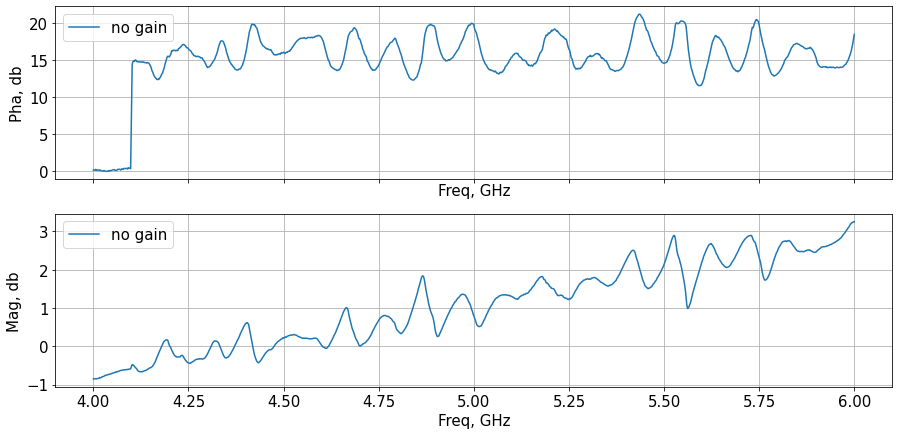

In [17]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(2, 1, figsize = (15, 7), sharex = True)
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Freq, GHz')
ax[0].set_ylabel('Pha, db')
ax[1].set_xlabel('Freq, GHz')
ax[1].set_ylabel('Mag, db')

ax[1].plot(freq/1e9, np.unwrap(pha)-np.unwrap(pha_ref), label = 'no gain')
ax[0].plot(freq/1e9, mag-mag_ref, label = 'no gain')

ax[0].legend()
ax[1].legend()

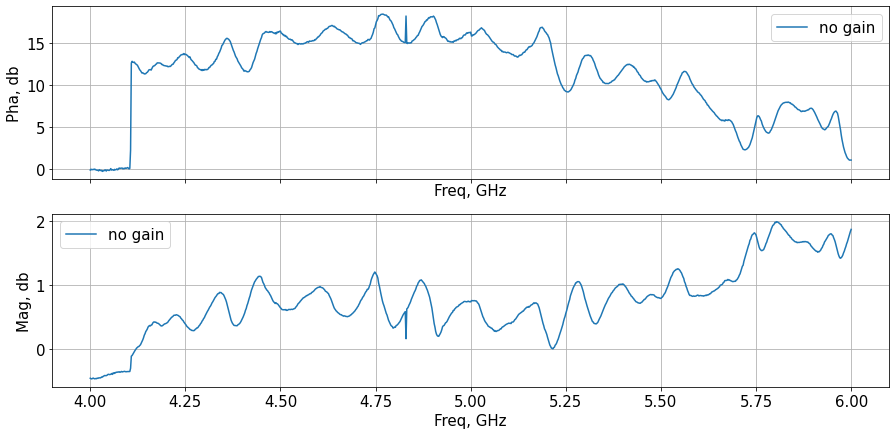

In [68]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(2, 1, figsize = (15, 7), sharex = True)
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Freq, GHz')
ax[0].set_ylabel('Pha, db')
ax[1].set_xlabel('Freq, GHz')
ax[1].set_ylabel('Mag, db')

ax[1].plot(freq/1e9, np.unwrap(pha)-np.unwrap(pha_ref), label = 'no gain')
ax[0].plot(freq/1e9, mag-mag_ref, label = 'no gain')

ax[0].legend()
ax[1].legend()
dc.set_off()

In [81]:
vna.set_off()